In [3]:
import tensorflow as tf
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, PReLU, ELU
from keras.callbacks import EarlyStopping , ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5
)

model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64, kernel_size=2, activation=PReLU(), padding="same"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64, activation=ELU()))
model.add(BatchNormalization())
model.add(Dense(32, activation=ELU()))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)
model_checkpoint = ModelCheckpoint('latest_check.h5', save_best_only=True)

model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=20, batch_size=42, validation_data=(x_test, y_test),callbacks=[early_stopping, reduce_lr, model_checkpoint])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        20800     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1429/1429 [==============================] - 30s 21ms/step - loss: 0.0948 - accuracy: 0.9732 - val_loss: 0.0418 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 3/20
1429/1429 [==============================] - 30s 21ms/step - loss: 0.0735 - accuracy: 0.9789 - val_loss: 0.0473 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 4/20
1429/1429 [==============================] - 31s 22ms/step - loss: 0.0600 - accuracy: 0.9827 - val_loss: 0.0425 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 5/20
1429/1429 [==============================] - 31s 22ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0312 - val_accuracy: 0.9909 - lr: 5.0000e-04
Epoch 6/20
1429/1429 [==============================] - 33s 23ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.0260 - val_accuracy: 0.9912 - lr: 5.0000e-04
Epoch 7/20
1429/1429 [==============================] - 37s 26ms/step - loss: 0.0298 - accuracy: 0.9916 - val_loss: 0.0281 - val_accuracy: 0.9923 - lr: 5.0000e-04
Epoch 8/20
1429/1429 [=======================

313/313 [==============================] - 2s 7ms/step
Example Predictions:
True Labels: [7 2 1 0 4 1 4 9 5 9]
Predicted Probabilities: [[3.18684812e-08 1.04371169e-08 4.91434662e-08 7.26328953e-09
  1.01525908e-08 7.92750399e-09 6.29322816e-10 9.99999762e-01
  3.75287093e-11 1.71964047e-07]
 [3.37199299e-06 9.06558739e-07 9.99991894e-01 7.95073447e-08
  1.48507269e-07 6.11613826e-09 3.02062085e-06 2.26250322e-07
  2.05416684e-09 3.17204012e-07]
 [2.16897416e-08 9.99989271e-01 1.93820867e-07 7.05911996e-10
  9.67660526e-06 4.48856881e-08 6.14577289e-07 1.05381893e-07
  3.76547078e-08 4.51871145e-08]
 [9.99996066e-01 9.42216118e-08 3.16113614e-07 1.03964677e-08
  1.43363055e-08 7.67574981e-09 3.43251827e-06 5.26408535e-08
  8.49117754e-09 1.40726797e-07]
 [4.48692061e-09 2.76562973e-09 7.32438554e-11 7.51083085e-11
  9.99998093e-01 1.52640484e-10 6.32801811e-09 1.79414938e-09
  8.75375239e-09 1.91081972e-06]
 [2.11773639e-08 9.99995232e-01 2.85615954e-07 1.28758115e-10
  3.58836405e-06 

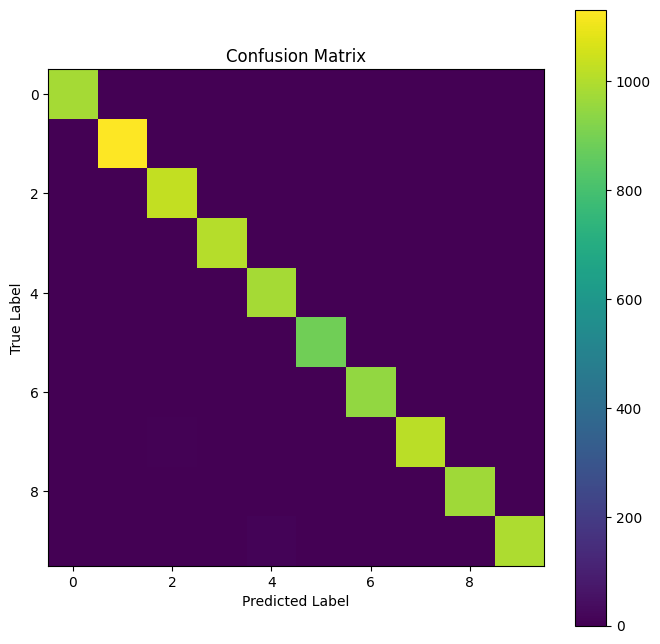

In [6]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

y_pred_probabilities = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

print("Example Predictions:")
print("True Labels:", y_test[:10])
print("Predicted Probabilities:", y_pred_probabilities[:10])
print("Predicted Classes:", y_pred_classes[:10])

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

conf_mat = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 8))
plt.imshow(conf_mat, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()